# Zero Vibration (ZV) Shaper Zeros check via QPmR

We consider the shaper of a form

$$
S(s) = A + (1-A)e^{-sT}
$$
with $A$ and $T$ parameters free for placing the zero.

In [19]:
# imports, matplotlib setup and logging setup
import logging

import matplotlib.pyplot as plt
import numpy as np

from qpmr import qpmr, distribution_diagram
from qpmr.qpmr_v2 import find_roots, create_vector_callable

logging.getLogger("matplotlib").setLevel(logging.ERROR)
logging.getLogger("PIL").setLevel(logging.ERROR)
logger = logging.getLogger("qpmr")

logging.basicConfig(level=logging.DEBUG)

In [20]:
# Obtain parameters of ZV shaper by placing zero
s0 = -2.3833 +23.7554j # zero to place
beta, omega = np.abs(np.real(s0)), np.abs(np.imag(s0))
T = np.pi / omega
A = np.exp(np.pi*beta/omega) / (1 + np.exp(np.pi*beta/omega))

In [21]:
# obtain zeros via QPmR
delays = np.array([0, T], dtype=np.float64)
coefs = np.array([[A], [1-A]])
region = [-10, 3, 0, 500]
roots, meta = qpmr(region, coefs, delays, numerical_method="newton", ds=1.0)
complex_grid = meta.complex_grid
value = meta.z_value

DEBUG:qpmr.qpmr_v2:Estimated size of complex grid = 162240.0 bytes
DEBUG:qpmr.numerical_methods:Numerical Newton converged in 3/100 steps, last MAX(|res|) = 2.7840278460536996e-12
DEBUG:qpmr.argument_principle:Enlarging region from region=[-10, 3, 0, 500] to reg=[-10.1, 3.1, -0.1, 500.1]
DEBUG:qpmr.argument_principle:Using argument principle, contour integral = 11.009315124426962 | rounded to 11.0
DEBUG:qpmr.argument_principle:Enlarging region from region=[-9.9, 2.9, 0.1, 499.9] to reg=[-10.0, 3.0, 0.0, 500.0]
DEBUG:qpmr.argument_principle:Using argument principle, contour integral = 11.009427476669948 | rounded to 11.0


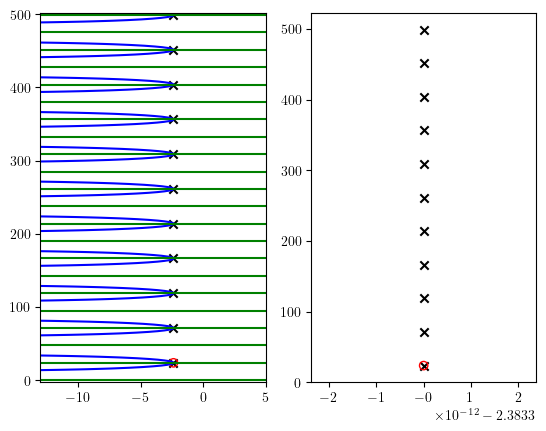

In [22]:
plt.figure()

plt.subplot(121)
plt.contour(np.real(complex_grid), np.imag(complex_grid), np.real(value), levels=[0], colors='blue')
plt.contour(np.real(complex_grid), np.imag(complex_grid), np.imag(value), levels=[0], colors='green')
plt.scatter(np.real(roots), np.imag(roots), marker="x", color="k")
plt.scatter(np.real(s0), np.imag(s0), marker="o", edgecolors="r", facecolors='none')

plt.subplot(122)
plt.scatter(np.real(roots), np.imag(roots), marker="x", color="k")
plt.scatter(np.real(s0), np.imag(s0), marker="o", edgecolors="r", facecolors='none')
plt.show()